In [1]:
#import stuff, and set seaborn up
from scipy.stats import norm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import pandas as pd
import time
from scipy.optimize import minimize

In [117]:
def create_gaussians_blues_oranges():
    blues = np.random.normal(35, 15, size=(100,))
    oranges = np.random.normal(65, 15, size=(100,))

    blues[blues<0] = 1
    blues[blues>100] = 99
    oranges[oranges<0] = 1
    oranges[oranges>100] = 99
    
    oranges = np.round(1000*oranges/sum(oranges))
    blues = np.round(1000*blues/sum(blues))
    

    if sum(oranges) < 1000:
        oranges[0] += 1000-sum(oranges)
    elif sum(oranges) > 1000:
        oranges[np.argmax(oranges)] -= -1000+sum(oranges)

    if sum(blues) < 1000:
        blues[0] += 1000-sum(blues)
    elif sum(oranges) > 1000:
        blues[np.argmax(blues)] -= -1000+sum(blues)
        
    true_blues = np.zeros(1)
    true_oranges = np.zeros(1)
    

        
    for i in range(100):
        num_blues = int(blues[i])
        num_oranges = int(oranges[i])
        
        if num_blues >= 0 and num_oranges >= 0:

            elements_blues = np.multiply(np.ones(num_blues),i)
            elements_oranges = np.multiply(np.ones(num_oranges), i)

            true_blues = np.concatenate((true_blues, elements_blues), axis=0)
            true_oranges = np.concatenate((true_oranges, elements_oranges), axis=0)
           
#     blues = true_blues
#     oranges = true_oranges

    return true_blues, true_oranges, blues, oranges


def brownian_population(delta=2, dt=1, n=100, x=0):

    history=np.zeros(n)
    
    # Iterate to compute the steps of the Brownian motion.
    for i in range(n):
        x = x + norm.rvs(scale=delta**2*dt)
        history[i] = x
    
    history = history+np.abs(np.min(history))
    
    original_hist = np.copy(history)
    old_mean = mean_pop(original_hist)
    
    history = np.round(999*history/sum(history))
    
    mean = np.round(np.average(history))
    
    if sum(history) < 999:
        history[0] += 999-sum(history)
        
    elif sum(history) > 999:  
        history[np.argmax(history)] -= -999+sum(history)        
    

    return history, old_mean, original_hist

def mean_pop(a):
    mean = 0
    for i in range(len(a)):
        mean += a[i]*i

    mean = int(mean/sum(a))

    return mean



def create_blues_and_oranges():
    a, mean_a, _ = brownian_population()
    b, mean_b, _ = brownian_population()

    if mean_a >= mean_b:
        blues = np.copy(b)
        oranges = np.copy(a)
    elif mean_a < mean_b:
        blues = np.copy(a)
        oranges = np.copy(b)
    else:
        print("um")

    true_blues = np.zeros(1)
    true_oranges = np.zeros(1)
    
    for i in range(100):
        num_blues = int(blues[i])
        num_oranges = int(oranges[i])
        
        if num_blues >= 0 and num_oranges >= 0:

            elements_blues = np.multiply(np.ones(num_blues),i)
            elements_oranges = np.multiply(np.ones(num_oranges), i)

            true_blues = np.concatenate((true_blues, elements_blues), axis=0)
            true_oranges = np.concatenate((true_oranges, elements_oranges), axis=0)

    #determine who defaulted
    blues_who_defaulted = true_blues < np.random.randint(100, size=(1000,))
    oranges_who_defaulted = true_oranges < np.random.randint(100, size=(1000,))

    blues = true_blues
    oranges = true_oranges
    
    return blues, oranges, blues_who_defaulted, oranges_who_defaulted, mean_a, mean_b
    

In [96]:
a, b, c, d = create_gaussians_blues_oranges()
sum(b)

49414.0

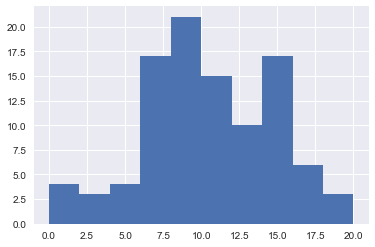

In [102]:
plt.hist(c)
plt.show()

In [100]:
print(c)

[ 6. 10. 14.  7. 12.  8. 12.  8. 16.  7.  6. 14. 13.  9.  7. 15. 11. 20.
 10.  6. 14.  9. 10. 13. 10. 13. 12. 14. 17. 11.  3.  7. 19. 11.  9. 14.
 11. 10.  9.  0. 10.  6. 13.  2.  0.  5. 16. 16.  7.  6. 20. 10. 14. 16.
 13.  5.  8. 17.  9.  8.  7. 14.  0.  7.  9.  5.  8.  8. 13. 11. 11.  0.
  4. 14. 14. 14.  8.  9.  7.  2. 15.  8. 12. 15.  8.  7.  7.  8.  7. 14.
  8. 11.  8.  6. 15.  9.  9. 14. 15. 11.]


In [101]:
print(a[0:200])

[ 0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.
  3.  3.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  5.  5.  5.  5.
  5.  5.  5.  5.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  7.  7.
  7.  7.  7.  7.  7.  7.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  9.  9.  9.  9.  9.  9.  9. 10. 10. 10. 10. 10. 10. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 12. 12. 12. 12. 12.
 12. 12. 12. 12. 12. 12. 12. 12. 13. 13. 13. 13. 13. 13. 13. 13. 13. 14.
 14. 14. 14. 14. 14. 14. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 15. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 18. 18.
 18. 18.]


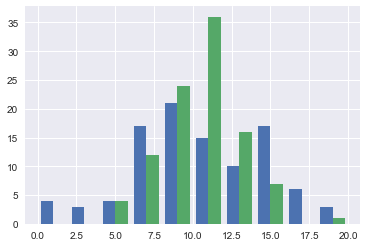

In [98]:
plt.hist((c, d))
plt.show()

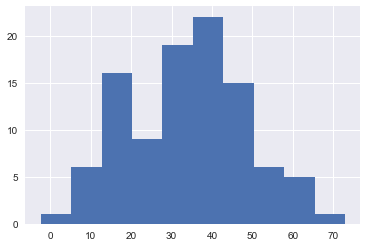

In [55]:
blues = np.random.normal(35, 15, size=(100,))
plt.hist(blues)
plt.show()

In [113]:
a, b, c = brownian_population()

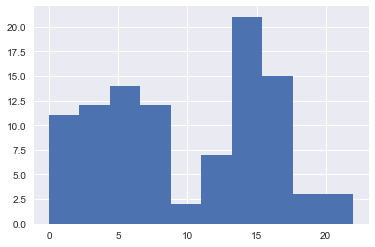

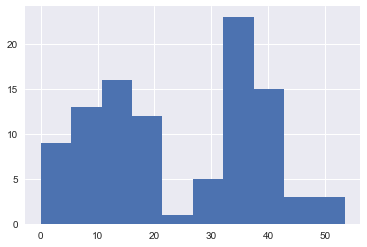

In [114]:
plt.hist(a)
plt.show()
plt.hist(c)
plt.show()

In [116]:
print(c.shape)

(100,)
